### Questions:
1. Show the Year-wise average pollution with a Line chart.
2. Draw the Area plot showing the average pollution Month wise.
3. Draw a Bar graph to show the Hour-wise average pollution.
4. Usually in which month/s, the air was recorded 'Very Unhealthy'.
5. Usually in which month/s, the air was fresh(good).
6. In year 2018, how many times the AQI was recorded 'Moderate'.
7. How was the weather in the month of January and July.

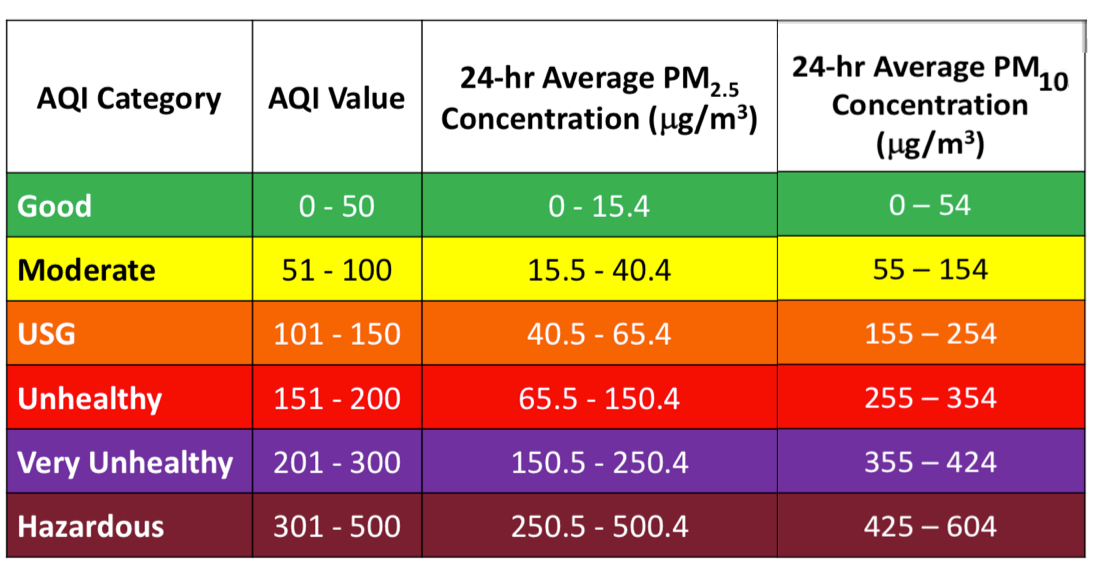

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("air-quality-data.csv")

In [4]:
df.head()

,Timestamp,PM2.5
0,01-01-2018 00:00,90.19
1,01-01-2018 01:00,86.98
2,01-01-2018 02:00,86.06
3,01-01-2018 03:00,94.04
4,01-01-2018 04:00,108.78


* Not more PM2.5 More polluted air
* PM = Psrticulate Matter or Particlas present in the air for long time

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31861 entries, 0 to 31860
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  31861 non-null  object 
 1   PM2.5      31861 non-null  float64
dtypes: float64(1), object(1)
memory usage: 498.0+ KB


In [10]:
#to convert opject datatypt to Timestamp format
df["Timestamp"]=pd.to_datetime(df.Timestamp)


In [11]:
df.head()

,Timestamp,PM2.5
0,2018-01-01 00:00:00,90.19
1,2018-01-01 01:00:00,86.98
2,2018-01-01 02:00:00,86.06
3,2018-01-01 03:00:00,94.04
4,2018-01-01 04:00:00,108.78


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31861 entries, 0 to 31860
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  31861 non-null  datetime64[ns]
 1   PM2.5      31861 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 498.0 KB


### Qusetion 1 

### Show the Year-wise average pollution with a Line chart.

In [13]:
# creat a new column Year
df['Year']= df.Timestamp.dt.year

In [14]:
df.head()

,Timestamp,PM2.5,Year
0,2018-01-01 00:00:00,90.19,2018
1,2018-01-01 01:00:00,86.98,2018
2,2018-01-01 02:00:00,86.06,2018
3,2018-01-01 03:00:00,94.04,2018
4,2018-01-01 04:00:00,108.78,2018


In [18]:
# Make a groupe with indevidual years using Groupby function
year_PM_avg=df.groupby("Year")["PM2.5"].mean()

In [19]:
year_PM_avg

Year
2018    54.468449
2019    49.511273
2020    42.386302
2021    44.850633
Name: PM2.5, dtype: float64

<AxesSubplot:xlabel='Year'>

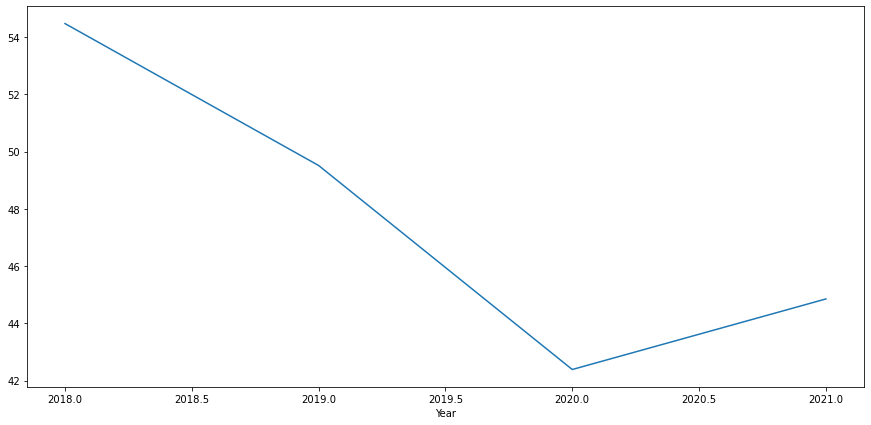

In [20]:
year_PM_avg.plot(kind="line", figsize=(15,7))

<AxesSubplot:xlabel='Year'>

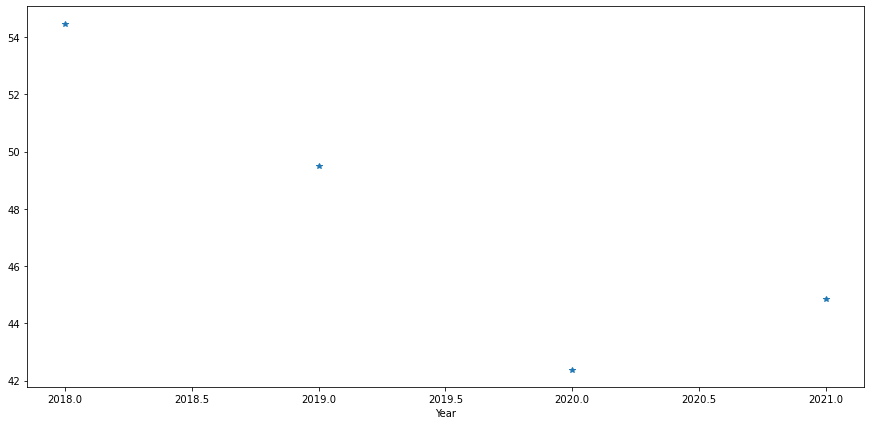

In [22]:
year_PM_avg.plot(kind="line", figsize=(15,7), style ="*")

### Qusetion 2:
### Draw the Area plot showing the average pollution Month wise.

In [29]:
df["Month"]=df.Timestamp.dt.month
df.head()

,Timestamp,PM2.5,Year,Month
0,2018-01-01 00:00:00,90.19,2018,1
1,2018-01-01 01:00:00,86.98,2018,1
2,2018-01-01 02:00:00,86.06,2018,1
3,2018-01-01 03:00:00,94.04,2018,1
4,2018-01-01 04:00:00,108.78,2018,1


In [25]:
month_PM_avg=df.groupby("Month")["PM2.5"].mean()

In [26]:
month_PM_avg

Month
1     65.829067
2     55.264291
3     49.666820
4     43.625814
5     39.816285
6     35.817151
7     31.884161
8     31.928300
9     36.324103
10    51.514817
11    60.017498
12    64.614865
Name: PM2.5, dtype: float64

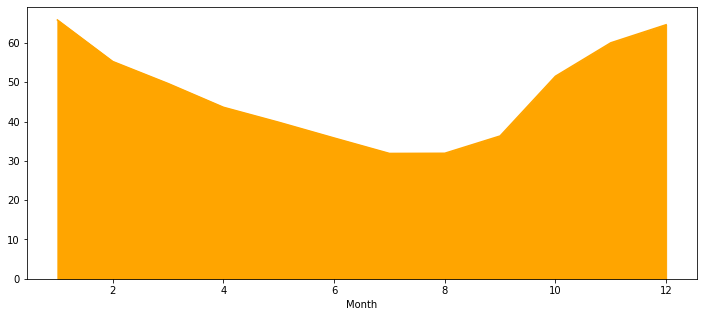

In [36]:
month_PM_avg.plot(kind="area", figsize=(12,5), color="orange");

### Qusetion 3:
### Draw a Bar graph to show the Hour-wise average pollution.

In [30]:
df["Hour"]=df.Timestamp.dt.hour
df.head()

,Timestamp,PM2.5,Year,Month,Hour
0,2018-01-01 00:00:00,90.19,2018,1,0
1,2018-01-01 01:00:00,86.98,2018,1,1
2,2018-01-01 02:00:00,86.06,2018,1,2
3,2018-01-01 03:00:00,94.04,2018,1,3
4,2018-01-01 04:00:00,108.78,2018,1,4


In [32]:
hour_PM_avg=df.groupby("Hour")["PM2.5"].mean()
hour_PM_avg

Hour
0     47.068769
1     46.403946
2     46.952281
3     49.150798
4     51.296204
5     51.908798
6     49.907545
7     47.518554
8     44.996127
9     42.681736
10    40.931766
11    39.393820
12    38.789992
13    39.323346
14    42.638162
15    47.500464
16    51.244844
17    53.669757
18    54.317363
19    54.120371
20    52.784130
21    51.383525
22    49.940615
23    48.538064
Name: PM2.5, dtype: float64

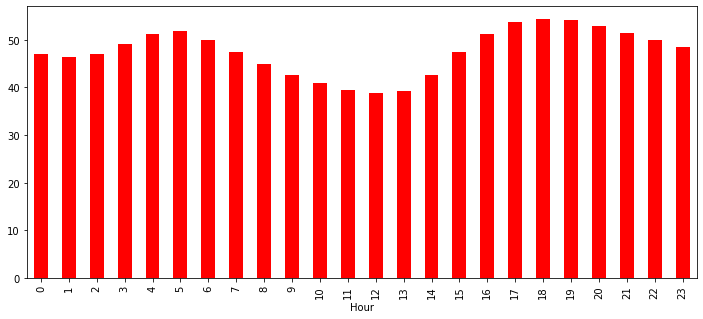

In [37]:
hour_PM_avg.plot(kind="bar", figsize=(12,5), color="red");

the lowest polution at 11,12,13 and the highst polution at 5,17,18,19

## Qusetion 4:
### Usually in which month/s, the air was recorded 'Very Unhealthy' (when PM2.5 = 150.5 to 250.4).

In [41]:
x=df[(df["PM2.5"]>=150.5) & (df["PM2.5"]<=250.4) ]

In [42]:
x

,Timestamp,PM2.5,Year,Month,Hour
6,2018-01-06 17:00:00,150.89,2018,1,17
7,2018-11-07 21:00:00,245.63,2018,11,21
8,2018-11-08 00:00:00,175.19,2018,11,0
31,2018-11-07 22:00:00,232.03,2018,11,22
32,2018-11-08 01:00:00,169.15,2018,11,1
55,2018-11-07 20:00:00,223.21,2018,11,20
56,2018-11-08 03:00:00,160.34,2018,11,3
79,2018-11-07 18:00:00,212.56,2018,11,18
103,2018-11-07 19:00:00,207.41,2018,11,19
126,2018-11-07 17:00:00,183.19,2018,11,17


In [43]:
x.value_counts("Month")

Month
11    16
10     5
1      5
2      2
dtype: int64

### Qusetion 5:
#### Usually in which month/s, the air was fresh(good)(when PM2.5 = 0 to 12).¶.

In [47]:
y= df[df["PM2.5"]<= 12]

In [45]:
y

,Timestamp,PM2.5,Year,Month,Hour
11423,2019-06-22 08:00:00,11.53,2019,6,8
11424,2019-06-22 09:00:00,10.31,2019,6,9
11471,2019-06-24 08:00:00,10.98,2019,6,8
11472,2019-06-24 09:00:00,11.64,2019,6,9
11535,2019-06-27 00:00:00,11.77,2019,6,0
11874,2019-07-13 09:00:00,7.02,2019,7,9
11875,2019-07-13 10:00:00,7.48,2019,7,10
11876,2019-07-13 11:00:00,7.61,2019,7,11
11879,2019-07-13 14:00:00,11.08,2019,7,14
11880,2019-07-13 15:00:00,10.21,2019,7,15


In [48]:
y.value_counts("Month")

Month
8    33
7     6
6     5
4     3
1     3
5     2
dtype: int64

### Question 6:
#### In year 2018, how many times the AQI was recorded 'Moderate'(when PM2.5 = 12.1 to 35.4).

In [50]:
z=df[(df["Year"] == 2018) & (df["PM2.5"]>= 12.1) & (df["PM2.5"]<= 35.4) ]

In [51]:
z

,Timestamp,PM2.5,Year,Month,Hour
1820,2018-01-04 04:00:00,33.34,2018,1,4
2038,2018-12-04 00:00:00,35.39,2018,12,0
2215,2018-04-19 13:00:00,28.90,2018,4,13
2306,2018-04-23 09:00:00,34.83,2018,4,9
2307,2018-04-23 11:00:00,33.50,2018,4,11
...,...,...,...,...,...
9981,2018-06-28 06:00:00,19.75,2018,6,6
9982,2018-07-17 07:00:00,19.27,2018,7,7
9983,2018-07-16 08:00:00,18.96,2018,7,8
10004,2018-08-25 06:00:00,17.45,2018,8,6


In [52]:
z.value_counts("PM2.5")

PM2.5
24.97    8
33.27    7
25.57    6
23.20    6
21.36    5
        ..
27.84    1
27.80    1
27.75    1
27.74    1
16.23    1
Length: 1247, dtype: int64

### Question 7:
#### How was the weather in the month of January and July?

In [61]:
# Using filter method
df[df["Month"]== 1]["PM2.5"].mean() # Unhealthy

65.82906685236783

In [62]:
df[df["Month"]== 7]["PM2.5"].mean()  # Moderate

31.884161466458643